# ARI3129 Traffic Sign Detection

## Model Training

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from ultralytics import YOLO

DATA_YAML = r"C:\Users\lucab\Desktop\ARI3129\ARI3129 - Assignment Materials\ARI3129 - Assignment Materials\YOLO_COCO_sign_type\data.yaml"

EPOCHS = 10
IMGSZ = 640
BATCH = 16        
DEVICE = 0

model = YOLO("yolo11l.pt")

train_results = model.train(
    data=DATA_YAML,
    epochs=EPOCHS,
    imgsz=IMGSZ,
    batch=BATCH,
    device=DEVICE,
    project="runs_sign_type",
    name="yolov11_sign_type",
    pretrained=True,
    patience=25,
    plots=True,
)

RUN_DIR = Path(train_results.save_dir)
print("Run dir:", RUN_DIR)
print("Best weights:", RUN_DIR / "weights" / "best.pt")
print("Last weights:", RUN_DIR / "weights" / "last.pt")

Ultralytics 8.4.6  Python-3.11.14 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 5060 Ti, 16311MiB)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\lucab\Desktop\ARI3129\ARI3129 - Assignment Materials\ARI3129 - Assignment Materials\YOLO_COCO_sign_type\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov11_sign_type6, nbs

## Metric visualisation

In [3]:
results_csv = RUN_DIR / "results.csv"
df = pd.read_csv(results_csv)

display(df.tail(3))

# Plot core detection metrics
plt.figure()
plt.plot(df["epoch"], df["metrics/precision(B)"], label="precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("epoch"); plt.legend(); plt.show()

# Plot losses
plt.figure()
plt.plot(df["epoch"], df["train/box_loss"], label="train/box_loss")
plt.plot(df["epoch"], df["val/box_loss"], label="val/box_loss")
plt.xlabel("epoch"); plt.legend(); plt.show()


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,lr/pg3,lr/pg4,lr/pg5,lr/pg6,lr/pg7
7,8,205.483,0.64535,0.73861,1.11774,0.81789,0.76548,0.85348,0.65811,0.82323,0.88333,1.21980,0.000921,0.000307,0.000921,0.000307,0.000921,0.000307,0.000921,0.000307
8,9,221.658,0.67660,0.68985,1.12312,0.83168,0.77954,0.85128,0.67452,0.78242,0.82736,1.19357,0.000624,0.000208,0.000624,0.000208,0.000624,0.000208,0.000624,0.000208
9,10,238.206,0.61588,0.60521,1.09664,0.80472,0.80522,0.85316,0.67513,0.79698,0.83693,1.19538,0.000327,0.000109,0.000327,0.000109,0.000327,0.000109,0.000327,0.000109


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## Test Run

In [18]:
best_model = YOLO(RUN_DIR / "weights" / "best.pt")

test_metrics = best_model.val(
    data=DATA_YAML,
    split="test",
    imgsz=IMGSZ,
    device=DEVICE,
    plots=True,
)

test_metrics

Ultralytics 8.4.6  Python-3.11.14 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 5060 Ti, 16311MiB)
YOLO11l summary (fused): 191 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access  (ping: 0.20.1 ms, read: 727.4421.6 MB/s, size: 1227.9 KB)
val: Scanning C:\Users\lucab\Desktop\ARI3129\ARI3129 - Assignment Materials\ARI3129 - Assignment Materials\YOLO_COCO_sign_type\labels\test.cache... 107 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 107/107  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 1.0it/s 6.8s0.5ss
                   all        107        113      0.825      0.766      0.853      0.679
     Blind_Spot_Mirror          6          6      0.671      0.833      0.751      0.668
              No_Entry         35         35      0.845      0.829      0.873      0.657
       No_Through_Road          7          7          1      0.554      0.909      0.812
   Pedestrian_Crossing         

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000025BC3671010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
 

## Visualisations

### Training

In [15]:
%matplotlib inline

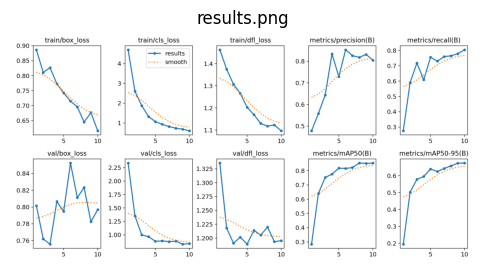

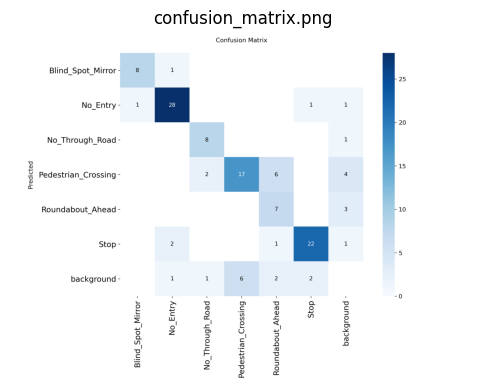

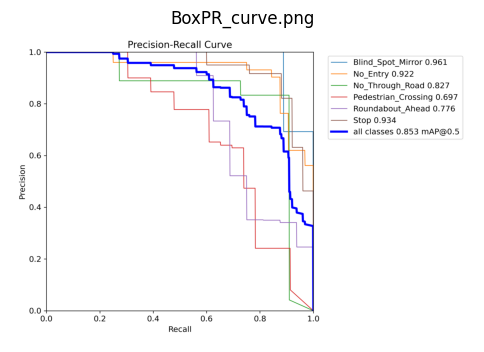

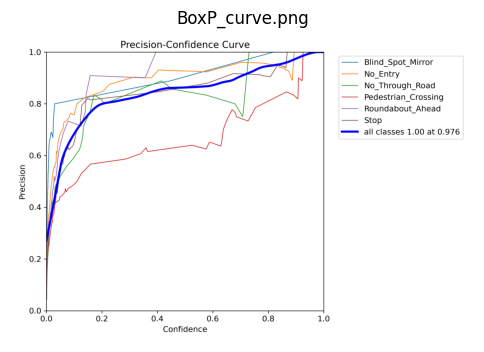

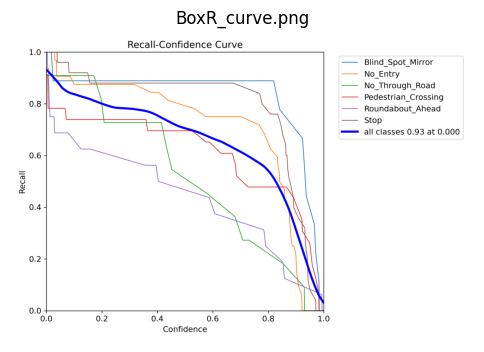

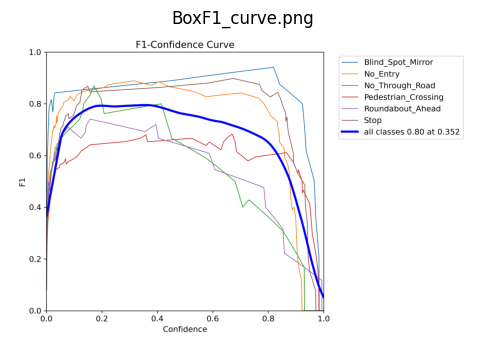

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

RUN_DIR = Path(r"C:\Users\lucab\Desktop\ARI3129\runs_sign_type\yolov11_sign_type6")

for name in [
    "results.png",
    "confusion_matrix.png",
    "BoxPR_curve.png",
    "BoxP_curve.png",
    "BoxR_curve.png",
    "BoxF1_curve.png",
]:
    img = Image.open(RUN_DIR / name)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(name)
    plt.show()


### Test Plots

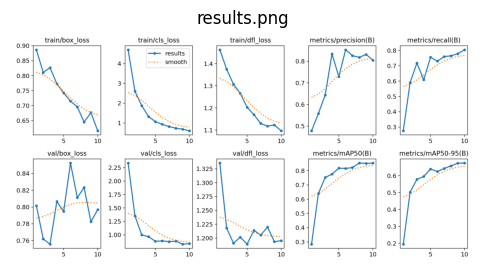

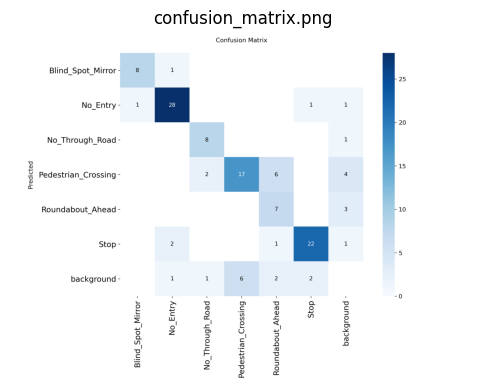

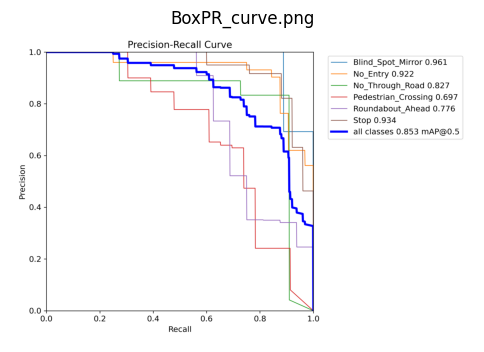

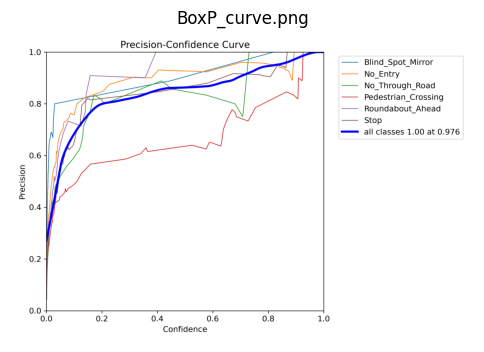

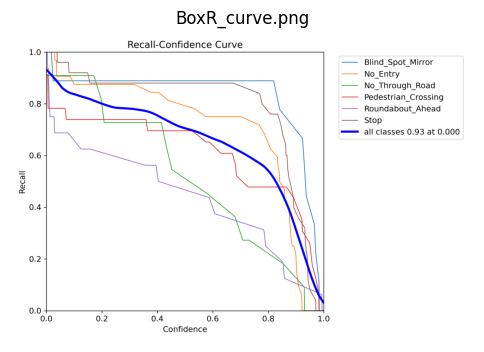

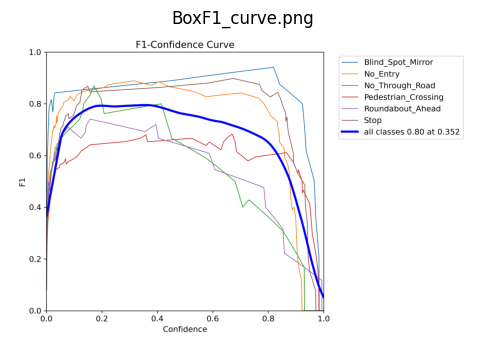

In [19]:
VAL_DIR = Path(r"C:\Users\lucab\Desktop\ARI3129\runs\detect\val5")

for name in [
    "results.png",
    "confusion_matrix.png",
    "BoxPR_curve.png",
    "BoxP_curve.png",
    "BoxR_curve.png",
    "BoxF1_curve.png",
]:
    img = Image.open(RUN_DIR / name)
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(name)
    plt.show()

In [29]:
from ultralytics import YOLO
from pathlib import Path
import pandas as pd

# Setting directories
RUN_DIR   = Path(r"C:\Users\lucab\Desktop\ARI3129\runs_sign_type\yolov11_sign_type6")
BEST_PT   = RUN_DIR / "weights" / "best.pt"
DATA_ROOT = Path(r"C:\Users\lucab\Desktop\ARI3129\ARI3129 - Assignment Materials\ARI3129 - Assignment Materials\YOLO_COCO_sign_type")
TEST_IMAGES = DATA_ROOT / "images" / "test"
TEST_LABELS = DATA_ROOT / "labels" / "test"

# Params
IMGSZ = 640
CONF = 0.25
DEVICE = 0

# Loading model
model = YOLO(str(BEST_PT))
names = model.names
class_ids = sorted(names.keys())

# Getting images in test
img_paths = []
for ext in ["*.jpg", "*.jpeg", "*.png"]:
    img_paths += list(TEST_IMAGES.glob(ext))
img_paths = sorted(img_paths)

# Accumulators per class
TP_c = {cid: 0 for cid in class_ids}
FP_c = {cid: 0 for cid in class_ids}
FN_c = {cid: 0 for cid in class_ids}

rows = []

for img_path in img_paths:
    gt = {cid: 0 for cid in class_ids}
    lab_path = TEST_LABELS / f"{img_path.stem}.txt"
    if lab_path.exists():
        for line in lab_path.read_text().splitlines():
            line = line.strip()
            if not line:
                continue
            cid = int(line.split()[0])
            if cid in gt:
                gt[cid] += 1

    pred = {cid: 0 for cid in class_ids}
    r = model.predict(
        source=str(img_path),
        imgsz=IMGSZ,
        conf=CONF,
        device=DEVICE,
        verbose=False
    )[0]

    if r.boxes is not None and len(r.boxes) > 0:
        pred_cls = r.boxes.cls.int().cpu().tolist()
        for cid in pred_cls:
            if cid in pred:
                pred[cid] += 1

    img_TP = {}
    img_FP = {}
    img_FN = {}

    for cid in class_ids:
        tp = min(pred[cid], gt[cid])
        fp = max(pred[cid] - gt[cid], 0)
        fn = max(gt[cid] - pred[cid], 0)

        img_TP[cid] = tp
        img_FP[cid] = fp
        img_FN[cid] = fn

        TP_c[cid] += tp
        FP_c[cid] += fp
        FN_c[cid] += fn

    TP_img = sum(img_TP.values())
    FP_img = sum(img_FP.values())
    FN_img = sum(img_FN.values())

    prec_img = TP_img / (TP_img + FP_img) if (TP_img + FP_img) else 0.0
    rec_img  = TP_img / (TP_img + FN_img) if (TP_img + FN_img) else 0.0
    f1_img   = (2 * prec_img * rec_img / (prec_img + rec_img)) if (prec_img + rec_img) else 0.0

    rows.append({
        "image": img_path.name,
        "gt_total": sum(gt.values()),
        "pred_total": sum(pred.values()),
        "TP": TP_img,
        "FP": FP_img,
        "FN": FN_img,
        "precision": prec_img,
        "recall": rec_img,
        "f1": f1_img,
        **{f"gt_{names[cid]}": gt[cid] for cid in class_ids},
        **{f"pred_{names[cid]}": pred[cid] for cid in class_ids},
    })

df_images = pd.DataFrame(rows)

class_rows = []
for cid in class_ids:
    tp, fp, fn = TP_c[cid], FP_c[cid], FN_c[cid]
    prec = tp / (tp + fp) if (tp + fp) else 0.0
    rec  = tp / (tp + fn) if (tp + fn) else 0.0
    f1   = (2 * prec * rec / (prec + rec)) if (prec + rec) else 0.0

    class_rows.append({
        "class_id": cid,
        "class_name": names[cid],
        "TP": tp,
        "FP": fp,
        "FN": fn,
        "precision": prec,
        "recall": rec,
        "f1": f1
    })

df_class = pd.DataFrame(class_rows)

# Precision
TP_total = sum(TP_c.values())
FP_total = sum(FP_c.values())
FN_total = sum(FN_c.values())

micro_precision = TP_total / (TP_total + FP_total) if (TP_total + FP_total) else 0.0
micro_recall    = TP_total / (TP_total + FN_total) if (TP_total + FN_total) else 0.0
micro_f1        = (2 * micro_precision * micro_recall / (micro_precision + micro_recall)) if (micro_precision + micro_recall) else 0.0

# Macro precision - Weighted
macro_precision = df_class["precision"].mean()
macro_recall    = df_class["recall"].mean()
macro_f1        = df_class["f1"].mean()

print(f"Micro Precision={micro_precision:.3f}  Micro Recall={micro_recall:.3f}  Micro F1={micro_f1:.3f}")
print(f"Macro Precision={macro_precision:.3f}  Macro Recall={macro_recall:.3f}  Macro F1={macro_f1:.3f}")

display(df_class.sort_values("f1"))

Micro Precision=0.820  Micro Recall=0.805  Micro F1=0.812
Macro Precision=0.818  Macro Recall=0.742  Macro F1=0.756


,class_id,class_name,TP,FP,FN,precision,recall,f1
2,2,No_Through_Road,3,0,4,1.000000,0.428571,0.600000
4,4,Roundabout_Ahead,7,2,4,0.777778,0.636364,0.700000
0,0,Blind_Spot_Mirror,5,3,1,0.625000,0.833333,0.714286
3,3,Pedestrian_Crossing,19,4,6,0.826087,0.760000,0.791667
1,1,No_Entry,29,5,6,0.852941,0.828571,0.840580
5,5,Stop,28,6,1,0.823529,0.965517,0.888889
